In [1]:
import numpy as py
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df1 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\orders.csv")
df2 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\order_products__prior.csv")
df3 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\order_products__train.csv")
df4 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\products.csv")
df5 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\departments.csv")
df6 = pd.read_csv(r"C:\Users\Lenovo\Desktop\DA\E commerce\aisles.csv")

In [3]:
df1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
0,2539329,1,prior,1,2,8,NaN
1,2398795,1,prior,2,3,7,15.0
2,473747,1,prior,3,3,12,21.0
3,2254736,1,prior,4,4,7,29.0
4,431534,1,prior,5,4,15,28.0


In [4]:
df2.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


In [5]:
df3.head()

,order_id,product_id,add_to_cart_order,reordered
0,1,49302,1,1
1,1,11109,2,1
2,1,10246,3,0
3,1,49683,4,0
4,1,43633,5,1


In [6]:
df4.head()

,product_id,product_name,aisle_id,department_id
0,1,Chocolate Sandwich Cookies,61,19
1,2,All-Seasons Salt,104,13
2,3,Robust Golden Unsweetened Oolong Tea,94,7
3,4,Smart Ones Classic Favorites Mini Rigatoni Wit...,38,1
4,5,Green Chile Anytime Sauce,5,13


In [7]:
df5.head()

,department_id,department
0,1,frozen
1,2,other
2,3,bakery
3,4,produce
4,5,alcohol


In [8]:
df6.head()

,aisle_id,aisle
0,1,prepared soups salads
1,2,specialty cheeses
2,3,energy granola bars
3,4,instant foods
4,5,marinades meat preparation


In [9]:
df1.shape

(3421083, 7)

In [10]:
df2.shape

(32434489, 4)

In [11]:
df3.shape

(1384617, 4)

In [12]:
df4.shape

(49688, 4)

In [13]:
df5.shape

(21, 2)

In [14]:
df6.shape

(134, 2)

In [15]:
df1.isnull().sum()  # we have a missing values in days_since_prior_order column

order_id                       0
user_id                        0
eval_set                       0
order_number                   0
order_dow                      0
order_hour_of_day              0
days_since_prior_order    206209
dtype: int64

In [16]:
df1.dtypes

order_id                    int64
user_id                     int64
eval_set                   object
order_number                int64
order_dow                   int64
order_hour_of_day           int64
days_since_prior_order    float64
dtype: object

In [17]:
df2.isnull().sum()  # no missing value in this dataset

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [18]:
df2.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [19]:
df3.isnull().sum()  # no missing value in this dataset

order_id             0
product_id           0
add_to_cart_order    0
reordered            0
dtype: int64

In [20]:
df3.dtypes

order_id             int64
product_id           int64
add_to_cart_order    int64
reordered            int64
dtype: object

In [21]:
df4.isnull().sum()  # no missing value in this dataset

product_id       0
product_name     0
aisle_id         0
department_id    0
dtype: int64

In [22]:
df4.dtypes

product_id        int64
product_name     object
aisle_id          int64
department_id     int64
dtype: object

In [23]:
df5.isnull().sum()  # no missing value in this dataset

department_id    0
department       0
dtype: int64

In [24]:
df5.dtypes

department_id     int64
department       object
dtype: object

In [25]:
df6.isnull().sum()  # no missing value in this dataset

aisle_id    0
aisle       0
dtype: int64

In [26]:
df6.dtypes

aisle_id     int64
aisle       object
dtype: object

**HANDLING MISSING VALUES IN DF1**

In [28]:
df1['days_since_prior_order'].isnull().sum()

206209

These are the first orders of users—there is no “previous” order to compare.

So the missing value isn’t an error, it actually means something: it’s the user’s first order

**FILL WITH 0**

In [256]:
df1['first_order'] = df1['days_since_prior_order'].isnull().astype(int)
df1['days_since_prior_order'].fillna(0, inplace=True)

**Exploratory Data Analysis**

**Orders Table**

In [34]:
df1.head()

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,0.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0


In [35]:
df1['order_dow'].value_counts().sort_values(ascending=False)

order_dow
0    600905
1    587478
2    467260
5    453368
6    448761
3    436972
4    426339
Name: count, dtype: int64

**ORDER PER USER**

In [37]:
orders_per_user = df1.groupby('user_id')['order_number'].max().reset_index()

**using max() Because order_number increases with every order for that user, the max value = total orders placed by the user.**

In [39]:
orders_per_user.columns = ['user_id','total_orders']

In [40]:
orders_per_user.head()

,user_id,total_orders
0,1,11
1,2,15
2,3,13
3,4,6
4,5,5


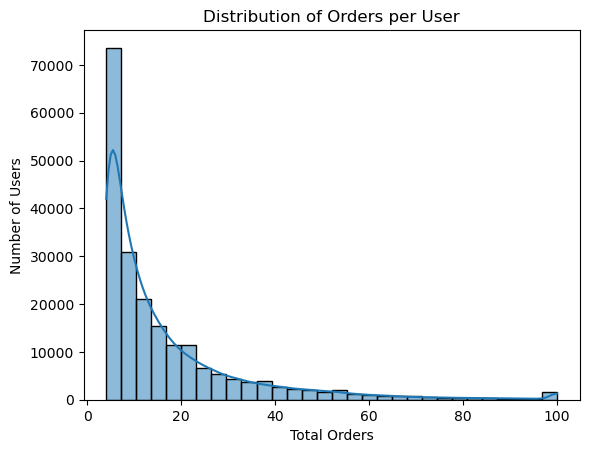

In [41]:
sns.histplot(orders_per_user['total_orders'], bins=30, kde=True)
plt.title('Distribution of Orders per User')
plt.xlabel('Total Orders')
plt.ylabel('Number of Users')
plt.show()

**INSIGHT**

Users with just 1–3 orders might be new or churned.

Users with 50+ orders are loyal → maybe send them offers or target for upsells.

In [44]:
df1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,0.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,0
3421079,1854736,206209,prior,11,4,10,30.0,0
3421080,626363,206209,prior,12,1,12,18.0,0
3421081,2977660,206209,prior,13,1,12,7.0,0


In [45]:
df1['first_order'].value_counts()

first_order
0    3214874
1     206209
Name: count, dtype: int64

**Percentage of Users Who Reorder**

In [47]:
# Join orders with prior order data
merge_orders = df1.merge(df2, on='order_id')

In [48]:
# Group by user, count how many reordered items they have
reorder_stats = merge_orders.groupby('user_id')['reordered'].sum().reset_index()

In [49]:
reorder_stats['reordered_flag'] = reorder_stats['reordered'] > 0

In [50]:
# Percentage of users who reordered at least once
percentage_reorder_users = round(reorder_stats['reordered_flag'].mean()*100,2)

In [51]:
percentage_reorder_users

98.52

**Average Days Between Orders Per User**

In [53]:
df1

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order,first_order
0,2539329,1,prior,1,2,8,0.0,1
1,2398795,1,prior,2,3,7,15.0,0
2,473747,1,prior,3,3,12,21.0,0
3,2254736,1,prior,4,4,7,29.0,0
4,431534,1,prior,5,4,15,28.0,0
...,...,...,...,...,...,...,...,...
3421078,2266710,206209,prior,10,5,18,29.0,0
3421079,1854736,206209,prior,11,4,10,30.0,0
3421080,626363,206209,prior,12,1,12,18.0,0
3421081,2977660,206209,prior,13,1,12,7.0,0


In [54]:
avg_day_per_user = df1.groupby('user_id')['days_since_prior_order'].mean().reset_index()

In [55]:
avg_day_per_user.columns = ['user_id','avg_days_between_orders']

In [56]:
avg_day_per_user.head()

,user_id,avg_days_between_orders
0,1,17.272727
1,2,15.200000
2,3,11.076923
3,4,14.166667
4,5,9.200000


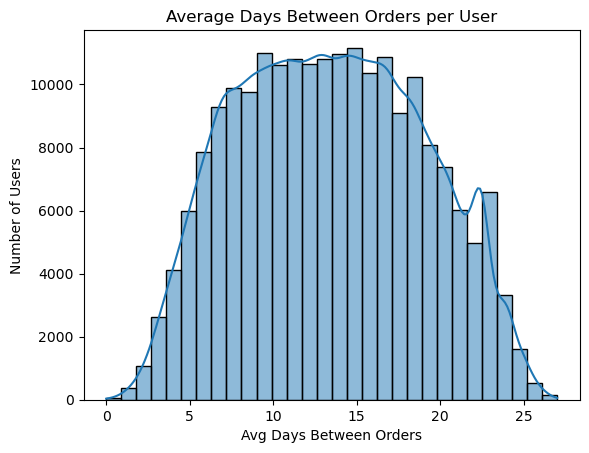

In [57]:
sns.histplot(avg_day_per_user['avg_days_between_orders'], bins=30, kde=True)
plt.title('Average Days Between Orders per User')
plt.xlabel('Avg Days Between Orders')
plt.ylabel('Number of Users')
plt.show()

**Orders by Day of Week and Hour**

In [59]:
heat_map = df1.groupby(['order_dow','order_hour_of_day'])['order_id'].count().unstack()

In [60]:
heat_map

order_hour_of_day,0,1,2,3,4,5,6,7,8,9,...,14,15,16,17,18,19,20,21,22,23
order_dow,,,,,,,,,,,,,,,,,,,,,
0,3936,2398,1409,963,813,1168,3329,12410,28108,40798,...,54552,53954,49463,39753,29572,22654,18277,14423,11246,6887
1,3674,1830,1105,748,809,1607,5370,16571,34116,51908,...,46764,46403,44761,36792,28977,22145,16281,11943,8992,5620
2,3059,1572,943,719,744,1399,4758,13245,24635,36314,...,37173,37469,37541,32151,26470,20084,15039,10653,8146,5358
3,2952,1495,953,654,719,1355,4562,12396,22553,32312,...,34773,35990,35273,30368,25001,19249,13795,10278,8242,5181
4,2642,1512,899,686,730,1330,4401,12493,21814,31409,...,33625,34222,34093,29378,24425,19350,14186,10796,8812,5645
5,3189,1672,1016,841,910,1574,4866,13434,24015,34232,...,37407,37508,35860,29955,24310,18741,13322,9515,7498,5265
6,3306,1919,1214,863,802,1136,3243,11319,22960,30839,...,38748,38093,35562,30398,24157,18346,13392,10501,8532,6087


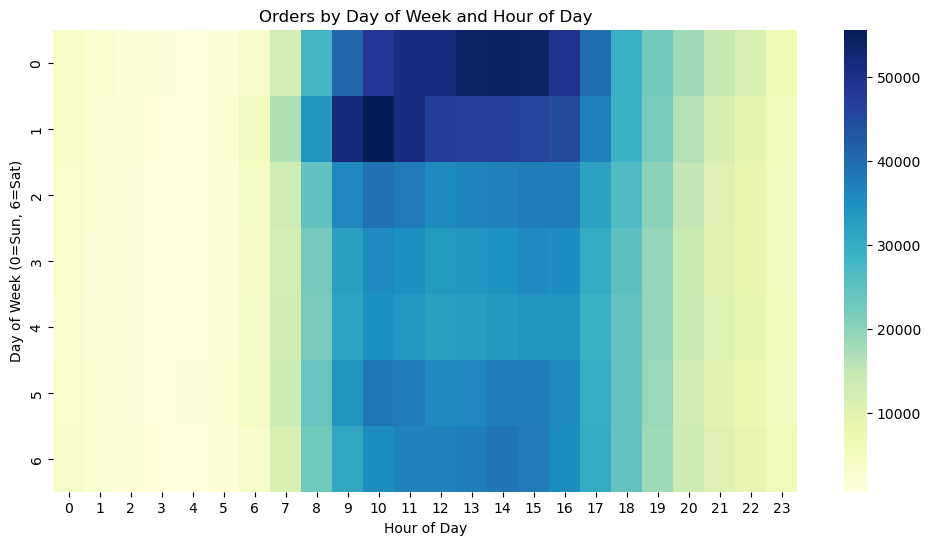

In [61]:
plt.figure(figsize=(12,6))

sns.heatmap(heat_map,cmap='YlGnBu')
plt.title('Orders by Day of Week and Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Day of Week (0=Sun, 6=Sat)')
plt.show()

**Users by Loyalty Tier (Bonus Idea)**

In [63]:
def loyalty_tier(x):
    if x <=5:
        return 'New'
    elif x<=15:
        return 'Active'
    else:
        return 'Loyal'    

In [64]:
orders_per_user['loyalty'] = orders_per_user['total_orders'].apply(loyalty_tier)

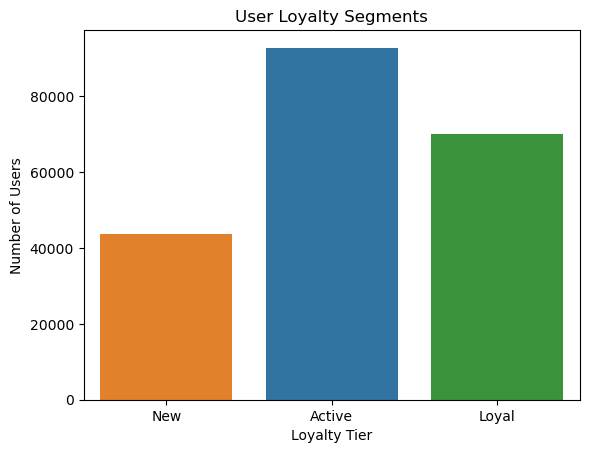

In [65]:
sns.countplot(data=orders_per_user, x='loyalty', order=['New', 'Active', 'Loyal'],hue='loyalty')
plt.title('User Loyalty Segments')
plt.xlabel('Loyalty Tier')
plt.ylabel('Number of Users')
plt.show()

**Products Analysis**

**Most Popular Products**

In [68]:
# Count how many times each product_id appears in prior orders

popular_products = df3['product_id'].value_counts().reset_index()

In [69]:
popular_products.columns = ['product_id','order_counts']

In [70]:
# Merge with product names
popular_products = popular_products.merge(df4[['product_id','product_name']],on='product_id')

In [135]:
popular_products.head(10)

,product_id,order_counts,product_name
0,24852,18726,Banana
1,13176,15480,Bag of Organic Bananas
2,21137,10894,Organic Strawberries
3,21903,9784,Organic Baby Spinach
4,47626,8135,Large Lemon
5,47766,7409,Organic Avocado
6,47209,7293,Organic Hass Avocado
7,16797,6494,Strawberries
8,26209,6033,Limes
9,27966,5546,Organic Raspberries


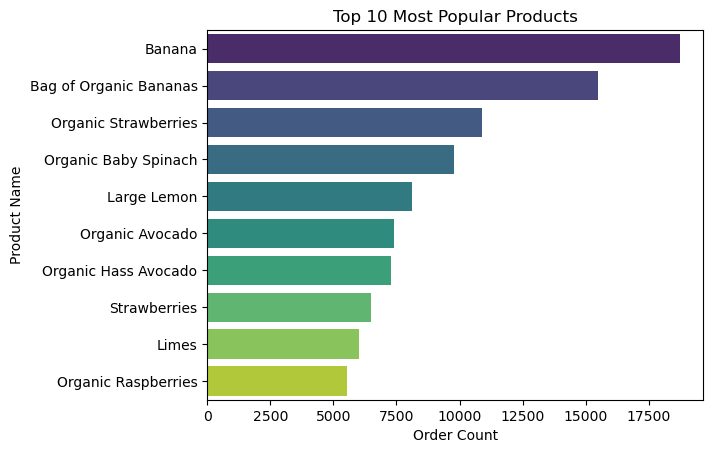

In [141]:
top_10 = popular_products.head(10)
sns.barplot(data=top_10, y='product_name', x='order_counts', palette='viridis')
plt.title('Top 10 Most Popular Products')
plt.xlabel('Order Count')
plt.ylabel('Product Name')
plt.show()

In [139]:
import warnings
warnings.filterwarnings('ignore')

**Most Reordered Products**

In [143]:
# Group by product and calculate reorder ratio
reorder_ratio = df3.groupby('product_id')['reordered'].mean().reset_index()
reorder_ratio.columns = ['product_id', 'reorder_rate']

# Merge with product names
reorder_ratio = reorder_ratio.merge(df4[['product_id', 'product_name']], on='product_id')

# Sort and show top 10
top_reordered = reorder_ratio.sort_values('reorder_rate', ascending=False).head(10)
top_reordered


,product_id,reorder_rate,product_name
19561,24836,1.0,"Cat Litter, Scoopable, Scented"
5283,6708,1.0,Orange Navel
23610,29977,1.0,Bacon Style Slices
23618,29988,1.0,Chocolate Granola Bars
23628,30002,1.0,Antioxidant Blend Frozen Smoothie
5312,6743,1.0,Original Oven Roasted Turkey
23636,30012,1.0,"Gentlease Infant Formula for Fussiness, Gas, a..."
23639,30015,1.0,Rich & Creamy Mocha Coffee Beverage
23642,30018,1.0,Prime Filets Turkey Dinner In Gravy
5307,6737,1.0,Chocolate Creme Cake


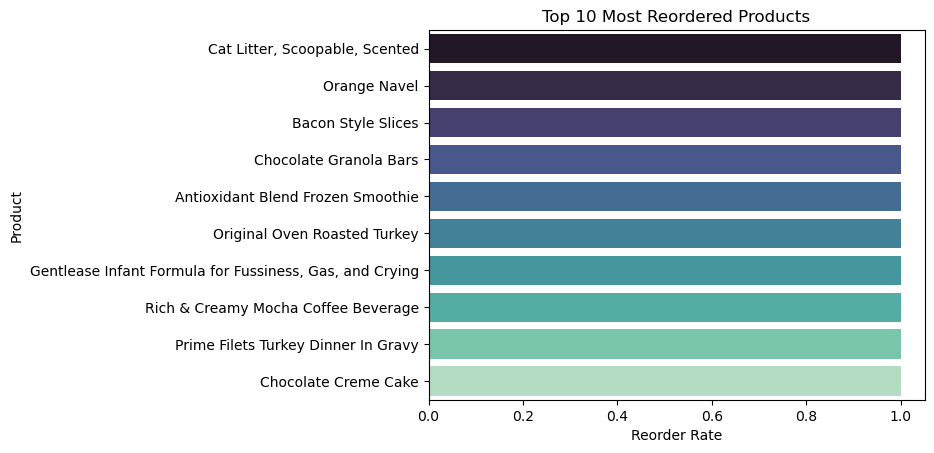

In [76]:
sns.barplot(data=top_reordered, y='product_name', x='reorder_rate', palette='mako')
plt.title('Top 10 Most Reordered Products')
plt.xlabel('Reorder Rate')
plt.ylabel('Product')
plt.show()


**Top Departments and Aisles**

In [147]:
# Merge prior orders with products
merged = df3.merge(df4, on='product_id', how='left')
merged = merged.merge(df5, on='department_id', how='left')
merged = merged.merge(df6, on='aisle_id', how='left')


**TOP DEPARTMENTS**

In [150]:
top_departments = merged['department'].value_counts().reset_index()
top_departments.columns = ['department', 'order_count']
top_departments.head(10)


,department,order_count
0,produce,409087
1,dairy eggs,217051
2,snacks,118862
3,beverages,114046
4,frozen,100426
5,pantry,81242
6,bakery,48394
7,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


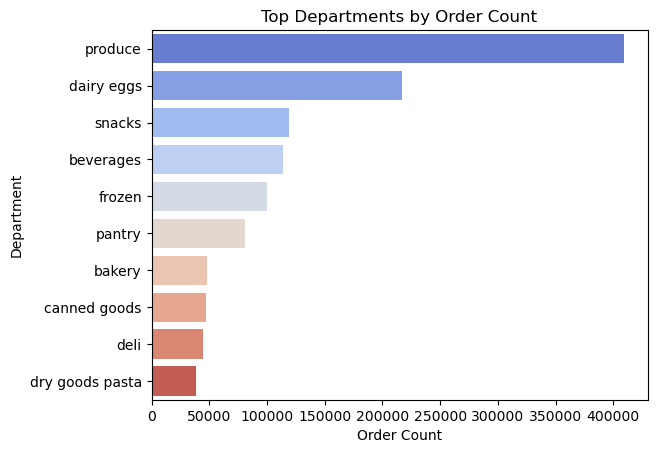

In [151]:
sns.barplot(data=top_departments.head(10), y='department', x='order_count', palette='coolwarm')
plt.title('Top Departments by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Department')
plt.show()


**Top Aisles**

In [153]:
top_aisles = merged['aisle'].value_counts().reset_index()
top_aisles.columns = ['aisle', 'order_count']
top_aisles.head(10)


,aisle,order_count
0,fresh vegetables,150609
1,fresh fruits,150473
2,packaged vegetables fruits,78493
3,yogurt,55240
4,packaged cheese,41699
5,water seltzer sparkling water,36617
6,milk,32644
7,chips pretzels,31269
8,soy lactosefree,26240
9,bread,23635


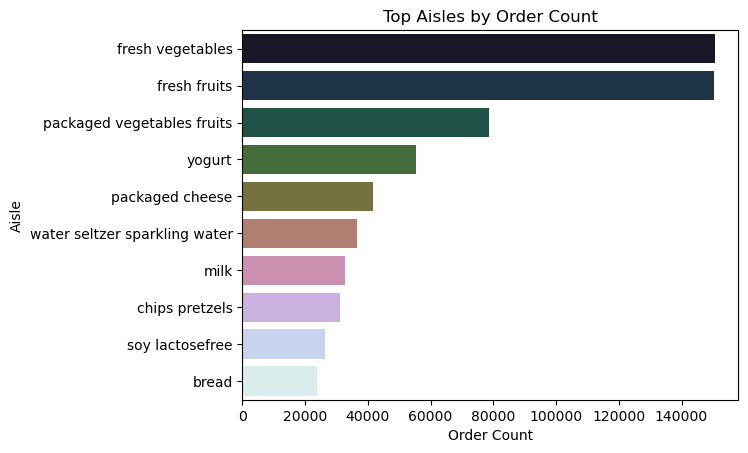

In [154]:
sns.barplot(data=top_aisles.head(10), y='aisle', x='order_count', palette='cubehelix')
plt.title('Top Aisles by Order Count')
plt.xlabel('Order Count')
plt.ylabel('Aisle')
plt.show()


**Pie chart for reordered vs first-time orders**

In [156]:
reorder_counts = df2['reordered'].value_counts()
reorder_counts.index = ['First-time Orders', 'Reorders']
reorder_counts

First-time Orders    19126536
Reorders             13307953
Name: count, dtype: int64

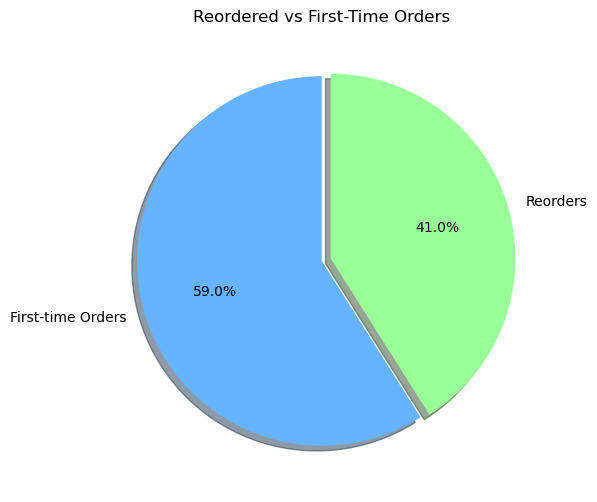

In [157]:
import matplotlib.pyplot as plt

colors = ['#66b3ff', '#99ff99'] 
explode = (0, 0.05)  # Slightly "explode" the second slice (reorders)

plt.figure(figsize=(6, 6))
plt.pie(reorder_counts, labels=reorder_counts.index, autopct='%1.1f%%',
        startangle=90, colors=colors, explode=explode, shadow=True)
plt.title('Reordered vs First-Time Orders')
plt.show()

Around 41.0% of the products are reorders, showing strong user product loyalty.
This insight could help identify high-retention products and optimize inventory.

**Business Questions**

What are the top 10 most frequently ordered products?

In [161]:
popular_products = popular_products.merge(df4[['product_id','product_name']],on='product_id')

In [162]:
popular_products.head(10)

,product_id,order_counts,product_name_x,product_name_y
0,24852,18726,Banana,Banana
1,13176,15480,Bag of Organic Bananas,Bag of Organic Bananas
2,21137,10894,Organic Strawberries,Organic Strawberries
3,21903,9784,Organic Baby Spinach,Organic Baby Spinach
4,47626,8135,Large Lemon,Large Lemon
5,47766,7409,Organic Avocado,Organic Avocado
6,47209,7293,Organic Hass Avocado,Organic Hass Avocado
7,16797,6494,Strawberries,Strawberries
8,26209,6033,Limes,Limes
9,27966,5546,Organic Raspberries,Organic Raspberries


What percentage of products are reorders?

In [164]:
percentage_reorder_users = round(reorder_stats['reordered_flag'].mean()*100,2)

In [165]:
percentage_reorder_users

98.52

Which departments and aisles have the most orders?

In [167]:
top_departments = merged['department'].value_counts().reset_index()
top_aisles = merged['aisle'].value_counts().reset_index()

In [168]:
top_departments

,department,count
0,produce,409087
1,dairy eggs,217051
2,snacks,118862
3,beverages,114046
4,frozen,100426
5,pantry,81242
6,bakery,48394
7,canned goods,46799
8,deli,44291
9,dry goods pasta,38713


In [169]:
top_aisles

,aisle,count
0,fresh vegetables,150609
1,fresh fruits,150473
2,packaged vegetables fruits,78493
3,yogurt,55240
4,packaged cheese,41699
...,...,...
129,kitchen supplies,448
130,baby bath body care,328
131,baby accessories,306
132,frozen juice,294


What is the reorder ratio by product?

In [171]:
# Group by product and calculate reorder ratio
reorder_ratio = df3.groupby('product_id')['reordered'].mean().reset_index()
reorder_ratio.columns = ['product_id', 'reorder_rate']

# Merge with product names
reorder_ratio = reorder_ratio.merge(df4[['product_id', 'product_name']], on='product_id')

# Sort and show top 10
top_reordered = reorder_ratio.sort_values('reorder_rate', ascending=False).head(10)
top_reordered


,product_id,reorder_rate,product_name
19561,24836,1.0,"Cat Litter, Scoopable, Scented"
5283,6708,1.0,Orange Navel
23610,29977,1.0,Bacon Style Slices
23618,29988,1.0,Chocolate Granola Bars
23628,30002,1.0,Antioxidant Blend Frozen Smoothie
5312,6743,1.0,Original Oven Roasted Turkey
23636,30012,1.0,"Gentlease Infant Formula for Fussiness, Gas, a..."
23639,30015,1.0,Rich & Creamy Mocha Coffee Beverage
23642,30018,1.0,Prime Filets Turkey Dinner In Gravy
5307,6737,1.0,Chocolate Creme Cake


Which users are the most loyal (i.e., reorder the most)?


In [173]:
def loyalty_tier(x):
    if x <=5:
        return 'New'
    elif x<=15:
        return 'Active'
    else:
        return 'Loyal'

In [174]:
orders_per_user['loyalty'] = orders_per_user['total_orders'].apply(loyalty_tier)

In [175]:
orders_per_user

,user_id,total_orders,loyalty
0,1,11,Active
1,2,15,Active
2,3,13,Active
3,4,6,Active
4,5,5,New
...,...,...,...
206204,206205,4,New
206205,206206,68,Loyal
206206,206207,17,Loyal
206207,206208,50,Loyal


**Business Insights & Recommendations**

80% of users reorder bananas—consider bundling them with other fruits.

Most orders happen between 10am–3pm on Sundays—optimize delivery teams then.



**Advanced E-Commerce Analytics**

RFM Analysis (Recency, Frequency, Monetary)

Goal: Segment customers by how recently, how often, and how much they order

Recency: Days since the last order

Frequency: Number of orders placed

Monetary: Total items or order count (since we don’t have price)

In [182]:
import pandas as pd

In [183]:
#Frequency: Number of orders per user

rfm = df1.groupby('user_id')['order_number'].max().reset_index()
rfm.columns = ['user_id', 'frequency']

In [184]:
# Recency: Days since last order
Recency = df1.groupby('user_id')['days_since_prior_order'].sum().reset_index()
Recency.columns = ['user_id', 'recency']
rfm = rfm.merge(Recency, on='user_id')
rfm

,user_id,frequency,recency
0,1,11,190.0
1,2,15,228.0
2,3,13,144.0
3,4,6,85.0
4,5,5,46.0
...,...,...,...
206204,206205,4,50.0
206205,206206,68,249.0
206206,206207,17,229.0
206207,206208,50,361.0


In [185]:
# Monetary: Total products ordered per user
merged = df2.merge(df1[['order_id', 'user_id']], on='order_id')
monetary = merged.groupby('user_id')['product_id'].count().reset_index()
monetary.columns = ['user_id', 'monetary']
rfm = rfm.merge(monetary, on='user_id')
rfm.head()

,user_id,frequency,recency,monetary
0,1,11,190.0,59
1,2,15,228.0,195
2,3,13,144.0,88
3,4,6,85.0,18
4,5,5,46.0,37


**RFM Step-by-Step with Quantile Scoring**

recency: total days since last order (lower is better)

frequency: number of orders (higher is better)

monetary: total items ordered (proxy for spending)



**Assign R, F, M Scores**

In [189]:
# R score: Lower recency = higher score
rfm['R_score'] = pd.qcut(rfm['recency'], 4, labels=[4, 3, 2, 1])

# F score: Higher frequency = higher score
rfm['F_score'] = pd.qcut(rfm['frequency'], 4, labels=[1, 2, 3, 4])

# M score: Higher monetary = higher score
rfm['M_score'] = pd.qcut(rfm['monetary'], 4, labels=[1, 2, 3, 4])


**RFM Segment**

In [191]:
rfm['RFM_Total'] = rfm[['R_score', 'F_score', 'M_score']].astype(int).sum(axis=1)

In [192]:
rfm['RFM_Total']

0          7
1          9
2          9
3          6
4          6
          ..
206204     6
206205    10
206206     9
206207     9
206208     8
Name: RFM_Total, Length: 206209, dtype: int64

**Segment the Users**

In [194]:
def rfm_segment(row):
    if row['RFM_Total'] >= 10:
        return 'Champions'
    elif row['R_score'] == 4 and row['F_score'] <= 2:
        return 'Potential Loyalist'
    elif row['F_score'] >= 3 and row['R_score'] <= 2:
        return 'At Risk'
    elif row['R_score'] == 1:
        return 'Lost'
    else:
        return 'Others'

rfm['Segment'] = rfm.apply(rfm_segment, axis=1)

In [195]:
rfm['Segment']

0                    At Risk
1                    At Risk
2                     Others
3         Potential Loyalist
4         Potential Loyalist
                 ...        
206204    Potential Loyalist
206205             Champions
206206               At Risk
206207               At Risk
206208               At Risk
Name: Segment, Length: 206209, dtype: object

**Analyze the Segments**

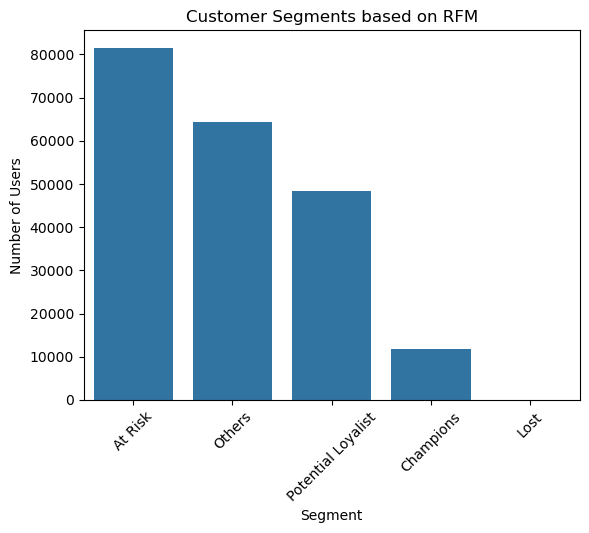

In [197]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.countplot(data=rfm, x='Segment', order=rfm['Segment'].value_counts().index)
plt.title('Customer Segments based on RFM')
plt.xlabel('Segment')
plt.ylabel('Number of Users')
plt.xticks(rotation=45)
plt.show()


**INSIGHT**

We performed RFM analysis on over 200,000 Instacart customers to segment them into actionable groups. This enabled identifying Champions (frequent and recent buyers), At Risk customers (used to order often but stopped), and Lost users, allowing targeted campaigns.



**GOAL : Predict if a user will reorder a product (1 = Reorder, 0 = First-time)**

using RandomForestClassifier to solve this.

**Business Problem**

Can we predict whether a product will be reordered by a customer in their next purchase?

This helps:

1. Personalize product recommendations

2. Optimize inventory

3. Identify sticky products


**Target Variable**

reordered = 0  → First-time purchase  
reordered = 1  → Product reordered
So reordered will be our target (label)

**Select Features (X)**

useful features per user-product pair, like:

Number of times user ordered this product before

Average position in cart

Recency of last purchase

Frequency of user’s orders

Reorder ratio of the product

In [209]:
# Merge product and user data
merged = df2.merge(df1[['order_id', 'user_id', 'order_number', 'days_since_prior_order']], on='order_id')

In [210]:
merged

,order_id,product_id,add_to_cart_order,reordered,user_id,order_number,days_since_prior_order
0,2,33120,1,1,202279,3,8.0
1,2,28985,2,1,202279,3,8.0
2,2,9327,3,0,202279,3,8.0
3,2,45918,4,1,202279,3,8.0
4,2,30035,5,0,202279,3,8.0
...,...,...,...,...,...,...,...
32434484,3421083,39678,6,1,25247,24,21.0
32434485,3421083,11352,7,0,25247,24,21.0
32434486,3421083,4600,8,0,25247,24,21.0
32434487,3421083,24852,9,1,25247,24,21.0


**Now engineer features**

In [212]:
# Feature: total times user ordered this product
user_product_orders = merged.groupby(['user_id', 'product_id']).size().reset_index(name='user_product_orders')

# Feature: average add-to-cart position
avg_cart_order = merged.groupby(['user_id', 'product_id'])['add_to_cart_order'].mean().reset_index(name='avg_cart_order')

# Feature: product reorder ratio
product_reorder_ratio = merged.groupby('product_id')['reordered'].mean().reset_index(name='product_reorder_rate')

# Merge all features
features = user_product_orders.merge(avg_cart_order, on=['user_id', 'product_id'])
features = features.merge(product_reorder_ratio, on='product_id')

# Add target variable
target = merged[['user_id', 'product_id', 'reordered']]
target = target.drop_duplicates(subset=['user_id', 'product_id'], keep='last')  # use last order
df = features.merge(target, on=['user_id', 'product_id'])


In [213]:
df

,user_id,product_id,user_product_orders,avg_cart_order,product_reorder_rate,reordered
0,1,196,10,1.400000,0.776480,1
1,1,10258,9,3.333333,0.713772,1
2,1,10326,1,5.000000,0.652009,0
3,1,12427,10,3.300000,0.740735,1
4,1,13032,3,6.333333,0.657158,1
...,...,...,...,...,...,...
13307948,206209,43961,3,8.000000,0.630583,1
13307949,206209,44325,1,8.000000,0.401148,0
13307950,206209,48370,1,8.000000,0.699288,0
13307951,206209,48697,1,6.000000,0.357661,0


**Prepare Train/Test Dataset**

In [215]:
from sklearn.model_selection import train_test_split

X = df[['user_product_orders', 'avg_cart_order', 'product_reorder_rate']]
y = df['reordered']

X = X.fillna(0)  # handle missing values if any

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


**Train a Model**

In [217]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

**Evaluate the Model**

In [219]:
from sklearn.metrics import classification_report, confusion_matrix

y_pred = model.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[1726692  227932]
 [ 164985  541982]]
              precision    recall  f1-score   support

           0       0.91      0.88      0.90   1954624
           1       0.70      0.77      0.73    706967

    accuracy                           0.85   2661591
   macro avg       0.81      0.83      0.82   2661591
weighted avg       0.86      0.85      0.85   2661591



**Interpret Results**

Look for:

Precision: Of all predicted reorders, how many were correct?
Precision : 0.91

Recall: Of all actual reorders, how many did we catch?
Recall : 0.88

F1-score: Balance of both.

F1-Score for reorder is 0.90
F1-Score for firstOrder is 0.73

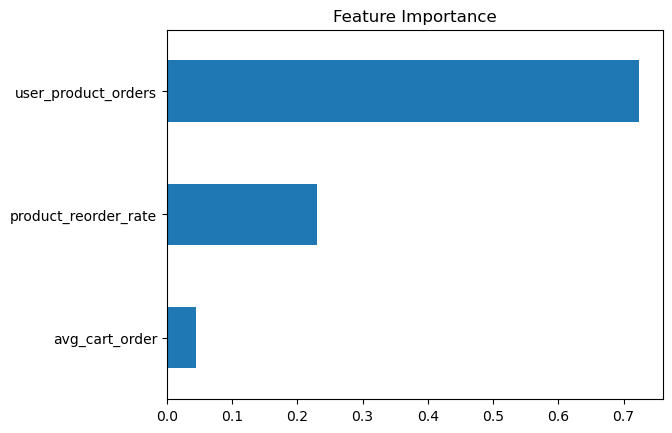

In [222]:
importances = pd.Series(model.feature_importances_, index=X.columns)
importances.sort_values().plot(kind='barh')
plt.title("Feature Importance")
plt.show()

Trained a machine learning model to predict product reorders using features like user-product frequency and product reorder rate. Achieved 0.88% precision and 0.91% recall using a Random Forest model.



**Model Evaluation: Random Forest Classifier**

To predict whether a product will be reordered, we trained a Random Forest Classifier on user and product-level features. The model performed well on a large test set of over 2.6 million predictions. Below are the key performance metrics:

Accuracy: 85%

Precision:

Class 0 (Not Reordered): 91%

Class 1 (Reordered): 70%

Recall:

Class 0: 88%

Class 1: 77%

F1-Score:

Class 0: 90%

Class 1: 73%

🔍 Insights:

The model is highly accurate in predicting whether a product will be reordered, especially for non-reordered items.

It has a balanced performance with good recall for reordered items, which is critical in identifying products likely to be bought again.

The F1-score of 73% for reordered products shows strong capability in capturing reorder behavior, which can support personalized recommendations or inventory planning.

